In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import nibabel as nb
import SUITPy as suit
import matplotlib.pyplot as plt
import seaborn as sb
import Functional_Fusion.atlas_map as am
from Functional_Fusion.dataset import *
import Functional_Fusion.matrix as matrix
import pickle
import sys
sys.path.append("..")
from ProbabilisticParcellation.util import *

base_dir = '/Volumes/diedrichsen_data$/data/FunctionalFusion'
if not Path(base_dir).exists():
    base_dir = '/srv/diedrichsen/data/FunctionalFusion'

This notebook plots the different parcellations, focussing on the HCP Resting-state data.

### Get the K=10 parcellations 

# Parcellating individual datasets

/Users/jdiedrichsen/opt/miniconda3/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


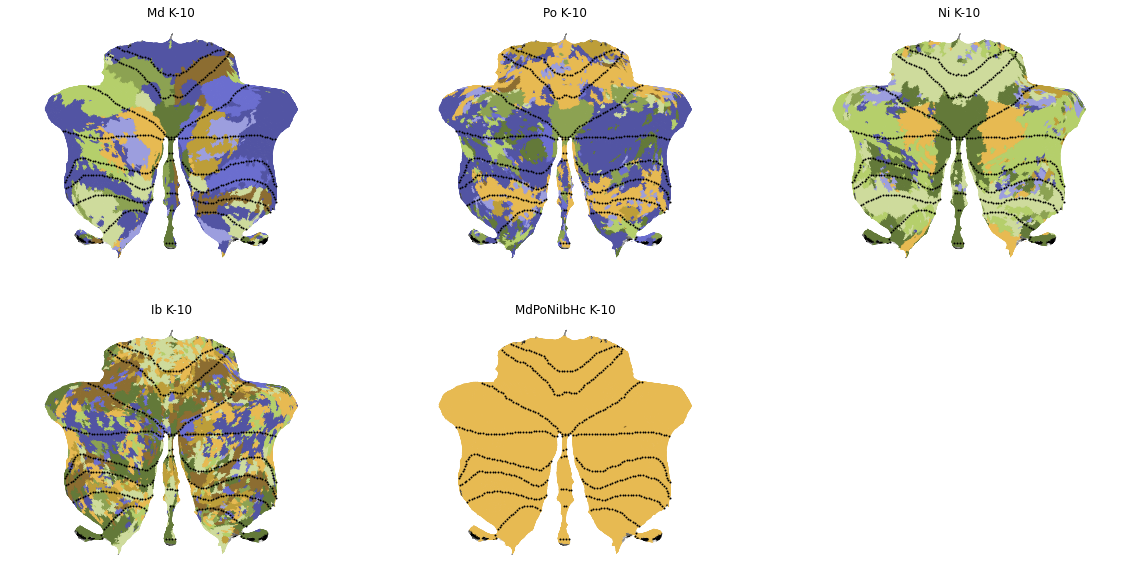

In [3]:
model_name = ['Models_02/asym_Md_space-MNISymC3_K-10',
                  'Models_02/asym_Po_space-MNISymC3_K-10',
                  'Models_02/asym_Ni_space-MNISymC3_K-10',
                  'Models_02/asym_Ib_space-MNISymC3_K-10',
                  'Models_02/HCP_IcoRun/asym_MdPoNiIbHc_space-MNISymC3_K-10']
fig = plt.figure(figsize=(20,10))
plot_model_parcel(model_name,[2,3])

### Check what went wrong with the last parcellation

In [5]:
minfo,model=load_batch_best('Models_02/HCP_IcoRun/asym_MdPoNiIbHc_space-MNISymC3_K-10')

In [6]:
model.emissions[4].kappa

tensor(3.7065)